In [36]:
import csv
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

dates=[]
prices=[]


In [37]:
def get_data(filename,ticker):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader) # skipping column names
        for row in csvFileReader:
            
            if(row[7]==ticker):
                dates.append(int(row[0].split('/')[1]))
                prices.append(float(row[4]))
    return
get_data('stock_data_monthly.csv','AMZN')

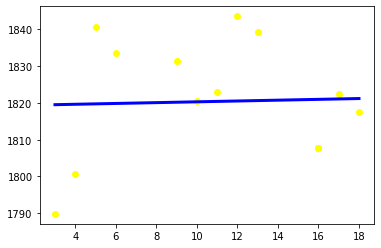

In [38]:
def show_plot(dates,prices):
    linear_mod = LinearRegression()
    dates = np.reshape(dates,(len(dates),1)) # converting to matrix of n X 1
    prices = np.reshape(prices,(len(prices),1))
    linear_mod.fit(dates,prices) #fitting the data points in the model
    plt.scatter(dates,prices,color='yellow') #plotting the initial datapoints 
    plt.plot(dates,linear_mod.predict(dates),color='blue',linewidth=3) #plotting the line made by linear regression
    plt.show()
    return
show_plot(dates,prices)

14


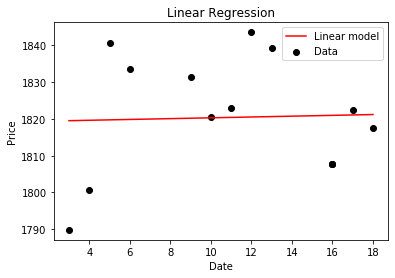

[1819.18650213]
[[0.11146699]]


(array([1821.63877587]), 0.11146698836242773, 1819.1865021296758)

In [69]:
def predict_price(dates, prices, x):
    print(len(dates))
    dates = np.reshape(dates, (len(dates),1)) # converting to matrix of n X 1
    prices = np.reshape(prices, (len(prices),1))
    
    linear_mod = LinearRegression() # defining the linear regression model
    linear_mod.fit(dates, prices) # fitting the data points in the model
    
    plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
    plt.plot(dates, linear_mod.predict(dates), color= 'red', label= 'Linear model') # plotting the line made by linear regression
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()
    
    print(linear_mod.intercept_)
    print(linear_mod.coef_)
    
    
    return linear_mod.predict(np.array(x).reshape(-1,1))[0], linear_mod.coef_[0][0], linear_mod.intercept_[0]

predict_price(dates,prices,22)
